# Load libraries

In [1]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras import *

# image processing
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import img_to_array

# build your own nets
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [3]:
train_image_files_path = "/keras2production/fruits/Training/"
valid_image_files_path = "/keras2production/fruits/Test/"

# Keras

https://keras.io/

- try out different fruits and combinations of fruits to classify

In [4]:
fruit_list = ["Apricot", "Avocado", "Banana", "Clementine", "Cocos", "Kiwi", "Lemon", "Limes", 
              "Mandarine", "Orange", "Peach", "Pineapple", "Plum", "Pomegranate", "Raspberry", "Strawberry"]

favorite_fruits = ["Banana", "Pineapple", "Pomegranate", "Kiwi", "Orange", "Lemon"]



- play around with different data augmentation settings

In [5]:
output_n = len(fruit_list)
size = 50
img_width = 50
img_height = 50
channels = 3
batch_size = 16

train_data_gen = ImageDataGenerator(
    rescale = 1 / 255,
    #rshear_range = 0.2,
    rotation_range = 40
    # optional data augmentation
    #rotation_range = 40,
    #rwidth_shift_range = 0.2,
    #rheight_shift_range = 0.2,
    #rshear_range = 0.2,
    #rzoom_range = 0.2,
    #rhorizontal_flip = TRUE,
    #rfill_mode = "nearest"
)

valid_data_gen = ImageDataGenerator(
    # validation data shouldn't be augmented
    rescale = 1 / 255
)

train_image_array_gen = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    seed = 42)

valid_image_array_gen = valid_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    seed = 42)

Found 7709 images belonging to 16 classes.
Found 2428 images belonging to 16 classes.


- try out different layer combinations
- try out different hyperparameter settings
- train the model

In [6]:
model.add?

Object `model.add` not found.


In [7]:
epochs = 3
train_samples = train_image_array_gen.n
valid_samples = valid_image_array_gen.n
print(train_samples, valid_samples)

model = Sequential()

model.add(Conv2D(64, (3, 3), padding = "valid", input_shape = (img_width, img_height, channels)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), padding = "same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.5))

model.add(Conv2D(16, (3, 3), padding = "same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.5))

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.125))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(output_n))
model.add(Activation('softmax'))

print(model.summary())

7709 2428
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 16)        4624      


- download new images
- use them to predict based on your trained model

In [9]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = RMSprop(lr = 0.0001, decay = 1e-6),
              metrics = ['accuracy'])

In [10]:
history = model.fit_generator(
    train_image_array_gen,
    steps_per_epoch = int(train_samples / batch_size), 
    epochs = epochs, 
    validation_data = valid_image_array_gen,
    validation_steps = int(valid_samples / batch_size),
    verbose = 1
)

Epoch 1/3
481/481 [==============================] - 134s 278ms/step - loss: 0.2963 - acc: 0.9070 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 2/3
481/481 [==============================] - 135s 280ms/step - loss: 0.0539 - acc: 0.9813 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 3/3
481/481 [==============================] - 133s 277ms/step - loss: 0.0274 - acc: 0.9920 - val_loss: 0.0110 - val_acc: 0.9963


--2019-05-22 07:22:29--  https://www.snopes.com/tachyon/2016/03/3620766526_c806f185e0_b.jpg?resize=865,452
Resolving www.snopes.com (www.snopes.com)... 13.35.253.124, 13.35.253.55, 13.35.253.100, ...
Connecting to www.snopes.com (www.snopes.com)|13.35.253.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34898 (34K) [image/jpeg]
Saving to: ‘3620766526_c806f185e0_b.jpg?resize=865,452’

3620766526_c806f185 100%[===================>]  34.08K  --.-KB/s    in 0.004s  

2019-05-22 07:22:30 (7.74 MB/s) - ‘3620766526_c806f185e0_b.jpg?resize=865,452’ saved [34898/34898]

['/keras2production/notebooks/1-deeplearning/test_images/Banana/.ipynb_checkpoints/Banana_wiki-checkpoint.jpg', '/keras2production/notebooks/1-deeplearning/test_images/Banana/Banana_wiki.jpg']


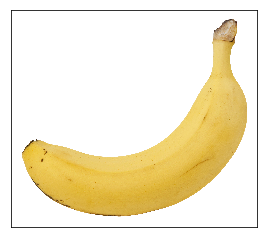

Predicted class: Banana with probability 99.99831914901733%


In [12]:
!wget https://www.snopes.com/tachyon/2016/03/3620766526_c806f185e0_b.jpg?resize=865,452
test_image_files_path = "/keras2production/notebooks/1-deeplearning/test_images/"
test_images = !find $test_image_files_path -type f -name "*.jpg"
print(test_images)
classes = train_image_array_gen.class_indices
classes

def classify_image_model(image, classes=classes):
    img = cv2.imread(image)        
    b,g,r = cv2.split(img)       # get b,g,r
    img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
    image = image_utils.load_img(image, target_size=(img_width, img_height))
    image = image_utils.img_to_array(image)

    image = np.expand_dims(image, axis=0)

    # scale pixels between -1 and 1, sample-wise
    image /= 255.
        
    prediction = model.predict(image)
    
    pred = prediction.argmax()

    for k, v in classes.items():
        if (v == pred):
            pred_label = k
        
    proba = prediction.max()
    
    print("Predicted class: " + pred_label + " with probability " + str(proba*100) + "%")
    
classify_image_model(test_images[0])

- Train another model with 20% validation split of the training data (Hint: ImageDataGenerator & flow_from_directory)
- Use `evaluate_generator` and `predict_generator` to measure performance of your model on the Test data folder